# TP 2 ALC 

## Integrantes:
- A
- B

## Dependencias

Tabla nutricional input POR DIA

Esto es lo que tenemos que calñcular con la funcion del Ejercicio 2

In [1]:
# Instalacion de paquetes faltantes
#!pip install scipy
#!pip install pandas --upgrade
#!pip install seaborn --upgrade
#!pip install scikit-learn
#!pip install matplotlib --upgrade

In [2]:
from funciones import *

### Consigna 1

Esta funcion devuelve la tabla nutricional con 0 completados, renombramiento y recalculo de Na, Ca y Fe. Faltaria normalizar las columnas de alimentos

In [17]:
tabla_view().head()

,Alimento,Cantidad (gr/ml),HC (gr),Proteinas (gr),Grasas (gr),Na (gr),Ca (gr),Fe (gr),Azucares Libres (gr),AGS (gr),AGNI (gr),AG p (gr),Fibra (gr),Verdura/Fruta
0,Leche fluida entera,270.00,12.42,8.37,7.83,0.15390,0.28350,0.18900,0.0,4.99,2.19,0.52,0.0,0.0
1,Leche entera en polvo,11.00,4.51,2.84,2.73,0.04444,0.09900,0.00006,0.0,1.62,0.77,0.06,0.0,0.0
2,Yogurt,19.00,2.45,0.51,0.49,0.00799,0.01767,0.00500,0.0,0.32,0.14,14.00,0.0,0.0
3,Queso crema,1.66,0.06,0.10,0.37,0.00123,0.00093,0.00000,0.0,0.36,0.11,0.01,0.0,0.0
4,Queso cuartirolo,3.66,0.06,0.77,0.80,0.02084,0.01654,0.00000,0.0,0.76,0.21,0.02,0.0,0.0


### Consigna 2

El ejercicio da Falso ya que falta hacer arreglo donde la cantidad maxima de nutrientes es la suma de nutrientes, no de la cantidad del alimento

In [4]:
chequeoDieta(tabla_view())

189.797 275.25 284.6955
1043.8835 1144.5 1423.4775
284.6955 97.89 569.391
10.35469  >  0.2
21.26  >  25
658.0 >= 400


True

### Consigna 3

Primero preparamos la tabla nutricional para un gramo de cada alimento (Aca tambien tenemos que hacer la cantidad de un gramo es de la cantidad o de la suma de nutrientes????)

In [18]:
tabla_nutricional = tabla_view()

tabla_limpia = tabla_nutricional.drop(columns=["Alimento", "Cantidad (gr/ml)", "Verdura/Fruta"])

tabla_divida = pd.DataFrame()

for i in range(0, len(tabla_nutricional)):
    tabla_divida = tabla_divida._append(tabla_limpia.iloc[i]/tabla_nutricional["Cantidad (gr/ml)"].iloc[i])

tabla_divida.head()


,HC (gr),Proteinas (gr),Grasas (gr),Na (gr),Ca (gr),Fe (gr),Azucares Libres (gr),AGS (gr),AGNI (gr),AG p (gr),Fibra (gr)
0,0.046000,0.031000,0.029000,0.000570,0.001050,0.000700,0.0,0.018481,0.008111,0.001926,0.0
1,0.410000,0.258182,0.248182,0.004040,0.009000,0.000005,0.0,0.147273,0.070000,0.005455,0.0
2,0.128947,0.026842,0.025789,0.000421,0.000930,0.000263,0.0,0.016842,0.007368,0.736842,0.0
3,0.036145,0.060241,0.222892,0.000741,0.000560,0.000000,0.0,0.216867,0.066265,0.006024,0.0
4,0.016393,0.210383,0.218579,0.005694,0.004519,0.000000,0.0,0.207650,0.057377,0.005464,0.0


Calculamos la matriz con escalado estandar (Tabla Estrella)

In [19]:
tabla_estrella = tabla_divida - tabla_divida.mean()

tabla_estrella.head()

,HC (gr),Proteinas (gr),Grasas (gr),Na (gr),Ca (gr),Fe (gr),Azucares Libres (gr),AGS (gr),AGNI (gr),AG p (gr),Fibra (gr)
0,-0.728436,-0.268976,-0.106251,-0.027621,0.000359,0.000668,-0.07063,-0.065349,-0.447618,-0.785917,-0.007621
1,-0.364436,-0.041794,0.112931,-0.024151,0.008309,-0.000026,-0.07063,0.063442,-0.385730,-0.782389,-0.007621
2,-0.645489,-0.273134,-0.109462,-0.027770,0.000239,0.000232,-0.07063,-0.066989,-0.448361,-0.051001,-0.007621
3,-0.738292,-0.239735,0.087640,-0.027450,-0.000130,-0.000032,-0.07063,0.133037,-0.389464,-0.781819,-0.007621
4,-0.758043,-0.089594,0.083328,-0.022497,0.003829,-0.000032,-0.07063,0.123819,-0.398352,-0.782379,-0.007621


Con esto podemos cacular la matriz de covarianza

In [20]:
covarianza = (tabla_estrella.transpose() @ tabla_estrella)/len(tabla_estrella)

covarianza.head()

,HC (gr),Proteinas (gr),Grasas (gr),Na (gr),Ca (gr),Fe (gr),Azucares Libres (gr),AGS (gr),AGNI (gr),AG p (gr),Fibra (gr)
HC (gr),17.515742,0.985654,-0.082100,-0.018136,-0.000347,-1.384835e-05,-0.000997,-0.032899,-0.105803,-0.493588,-0.003367
Proteinas (gr),0.985654,1.273516,0.177562,-0.006427,-0.000029,4.045507e-06,-0.019248,-0.015115,-0.093395,-0.133522,-0.000724
Grasas (gr),-0.082100,0.177562,0.075612,-0.003039,0.000056,-1.020134e-06,-0.007514,0.007124,-0.023257,0.151688,-0.000742
Na (gr),-0.018136,-0.006427,-0.003039,0.016559,-0.000005,-5.500017e-07,-0.001936,-0.000203,-0.012200,-0.016055,0.000309
Ca (gr),-0.000347,-0.000029,0.000056,-0.000005,0.000003,-9.532537e-10,-0.000006,0.000047,0.000514,0.000722,-0.000003


Calculamos los autovectores y autovalores de la matriz de Covarianza

In [21]:
gamma, U = np.linalg.eigh(covarianza)
U = np.flip(U, 1)


print("Autovalores: ", gamma)

for i in range(0, len(U)):
    print("Autovector ", i, ": ", U[:,i])


Autovalores:  [9.32031238e-09 2.92097496e-06 9.04233896e-05 1.61553248e-02
 3.87175189e-02 4.25735527e-02 6.61334339e-02 1.23962923e+00
 4.04627681e+00 6.14163286e+00 1.75966893e+01]
Autovector  0 :  [-9.97311780e-01 -6.05659620e-02  4.38220248e-03  1.00609877e-03
  2.17562522e-05  7.59642589e-07  1.71529205e-04  2.71408950e-03
  1.21690588e-02  3.90543829e-02  1.84126016e-04]
Autovector  1 :  [-3.03269461e-02  2.33944785e-02 -6.98679866e-03  3.04617741e-03
 -1.26798844e-04  9.81174770e-07 -2.42849225e-02 -3.31360028e-02
 -8.86758595e-01 -4.58743822e-01  6.41569572e-04]
Autovector  2 :  [-3.01674314e-02  1.42048141e-02 -3.53593783e-02  2.25452872e-03
 -9.78948152e-05  4.16311242e-07  2.89519852e-02 -6.86527245e-02
  4.60391520e-01 -8.83244484e-01  4.32234601e-04]
Autovector  3 :  [-5.81793603e-02  9.85434627e-01  1.56797636e-01 -5.11341803e-03
  1.90514679e-05  3.64495879e-06 -1.48107024e-02 -3.59868072e-03
  1.68613261e-02  2.01281225e-02 -5.98842460e-04]
Autovector  4 :  [-2.15351222

Veamos la variabilidad de cada autovector

In [10]:
for i in range(0, len(gamma)):
    print("Variabilidad de Autovector", i, ": ", 100*gamma[i]/sum(gamma), "%")

Variabilidad de Autovector 0 :  3.193210869434725e-08 %
Variabilidad de Autovector 1 :  1.000748538671016e-05 %
Variabilidad de Autovector 2 :  0.0003097975033639464 %
Variabilidad de Autovector 3 :  0.055349388077778665 %
Variabilidad de Autovector 4 :  0.13264920435578165 %
Variabilidad de Autovector 5 :  0.14586027344721111 %
Variabilidad de Autovector 6 :  0.22657824238965332 %
Variabilidad de Autovector 7 :  4.247065287495424 %
Variabilidad de Autovector 8 :  13.862856274137025 %
Variabilidad de Autovector 9 :  21.041707610187625 %
Variabilidad de Autovector 10 :  60.287613882988644 %


Esto nos dice que ya con los ultimos 3 autovectores vamos a tener una precision del casi 95% de los datos. Asi que calculamos nuestra nueva tabla con estos 3 autovectores

In [22]:
autovectores = U[:,len(U)-3:len(U)]

tabla_final =  tabla_estrella @ autovectores

tabla_final = tabla_final.rename(index = tabla_nutricional["Alimento"], columns={0:"Z1", 1:"Z2", 2:"Z3"})

tabla_final.head()

,Z1,Z2,Z3
Leche fluida entera,0.009117,0.000285,-0.000645
Leche entera en polvo,0.007885,0.008135,0.000029
Yogurt,0.008442,0.000097,-0.000209
Queso crema,0.008388,-0.000319,0.000045
Queso cuartirolo,0.008755,0.003652,0.000043


Veamos los graficos de cada uno de las convinaciones de columnas para sacar conclusiones

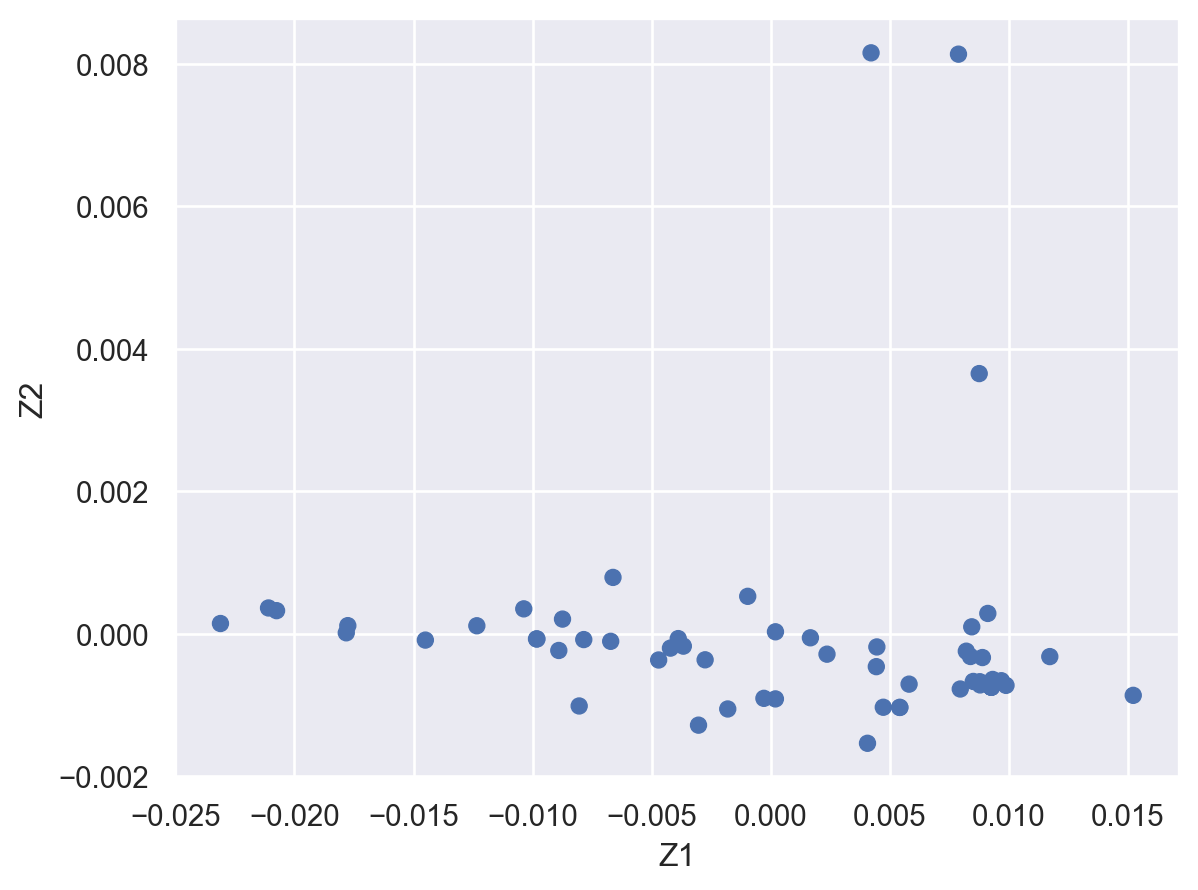

In [12]:
(
so.Plot()
.add(so.Dot(), data=tabla_final, x="Z1", y="Z2")
)

In [52]:
tabla_final[tabla_final["Z1"]<-0.02]

,Z1,Z2,Z3
Zanahoria,-0.021089,0.000362,-3.876502e-06
Harina trigo,-0.023107,0.000144,-1.886068e-05
Batata,-0.020751,0.000324,-7.597467e-07


In [53]:
tabla_final[tabla_final["Z1"]>0.015]

,Z1,Z2,Z3
Sal fina,0.015223,-0.000865,0.000051


In [55]:
tabla_divida.iloc[[16,28,32,53]].rename(index={16:"Zanahoria",28:"Harina trigo",32:"Batata",53:"Sal fina"})

,HC (gr),Proteinas (gr),Grasas (gr),Na (gr),Ca (gr),Fe (gr),Azucares Libres (gr),AGS (gr),AGNI (gr),AG p (gr),Fibra (gr)
Zanahoria,0.080000,0.010741,0.000000,0.00022,0.00037,0.000005,0.0,0.000000,0.000000,0.000000,0.03037
Harina trigo,0.687111,0.102889,0.026889,0.00010,0.00011,0.000015,0.0,0.004222,0.002444,0.011333,0.03200
Batata,0.167778,0.010000,0.000000,0.00006,0.00034,0.000002,0.0,0.000000,0.000000,0.000000,0.03000
Sal fina,0.000000,0.000000,0.000000,0.40000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000


In [33]:
tabla_final[tabla_final["Z2"]<-0.0015].index

Index(['Leche entera en polvo', 'Queso cuartirolo', 'Queso de rallar'], dtype='object')

In [49]:
tabla_final[tabla_final["Z2"]>0.002].index

Index(['Higado'], dtype='object')

In [56]:
tabla_divida.iloc[[1,4,5,12]].rename(index={1:'Leche entera en polvo',4:'Queso cuartirolo',5:'Queso de rallar',12:'Higado'})

,HC (gr),Proteinas (gr),Grasas (gr),Na (gr),Ca (gr),Fe (gr),Azucares Libres (gr),AGS (gr),AGNI (gr),AG p (gr),Fibra (gr)
Leche entera en polvo,0.410000,0.258182,0.248182,0.004040,0.009000,0.000005,0.0,0.147273,0.070000,0.005455,0.0
Queso cuartirolo,0.016393,0.210383,0.218579,0.005694,0.004519,0.000000,0.0,0.207650,0.057377,0.005464,0.0
Queso de rallar,0.036145,0.331325,0.271084,0.012301,0.009506,0.000000,0.0,0.216867,0.066265,4.819277,0.0
Higado,0.060000,0.196667,0.032222,0.000860,0.000040,0.000099,0.0,0.012222,4.777778,4.666667,0.0


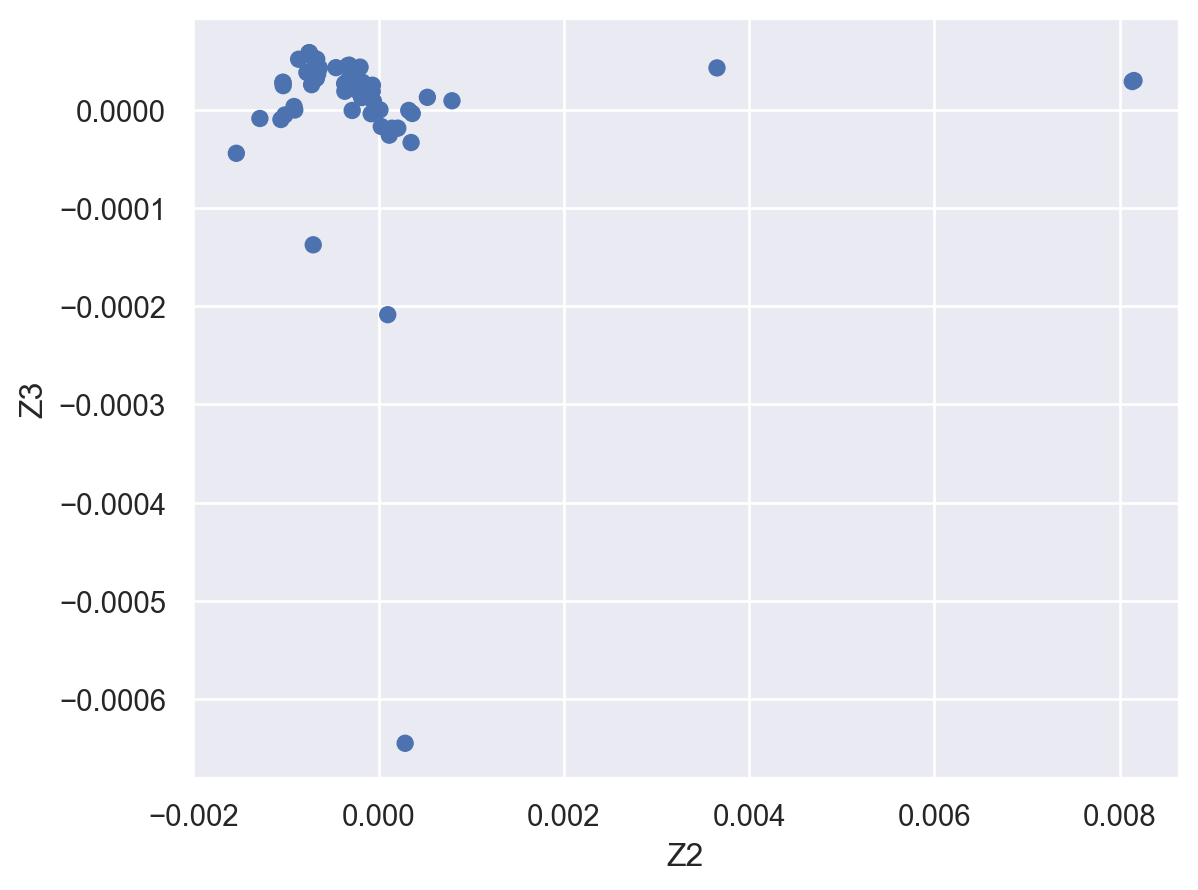

In [13]:
(
so.Plot()
.add(so.Dot(), data=tabla_final, x="Z2", y="Z3")
)

In [46]:
tabla_final[tabla_final["Z3"] < -0.0001]

,Z1,Z2,Z3
Leche fluida entera,0.009117,0.000285,-0.000645
Yogurt,0.008442,0.000097,-0.000209
Cerveza,0.005810,-0.000707,-0.000138


In [69]:
tabla_final[tabla_final["Z3"] > 0.000055]

,Z1,Z2,Z3
Soda,0.009264,-0.00075,0.000058
Vinagre,0.009264,-0.00075,0.000058
Cafe,0.009264,-0.00075,0.000058
Yerba,0.009264,-0.00075,0.000058


In [71]:
tabla_divida.iloc[[0,2,50,52,54,55,56]].rename(index={0:"Leche fluida entera",2:"Yogurt",50:"Cerveza",52:"Soda",54:"Vinagre",55:"Cafe",56:"Yerba"})

,HC (gr),Proteinas (gr),Grasas (gr),Na (gr),Ca (gr),Fe (gr),Azucares Libres (gr),AGS (gr),AGNI (gr),AG p (gr),Fibra (gr)
Leche fluida entera,0.046000,0.031000,0.029000,0.000570,0.00105,0.000700,0.0,0.018481,0.008111,0.001926,0.0
Yogurt,0.128947,0.026842,0.025789,0.000421,0.00093,0.000263,0.0,0.016842,0.007368,0.736842,0.0
Cerveza,1.476190,3.000000,0.571429,0.000040,0.00005,0.000190,0.0,0.000000,0.000000,0.000000,0.0
Soda,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
Vinagre,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
Cafe,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
Yerba,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.0


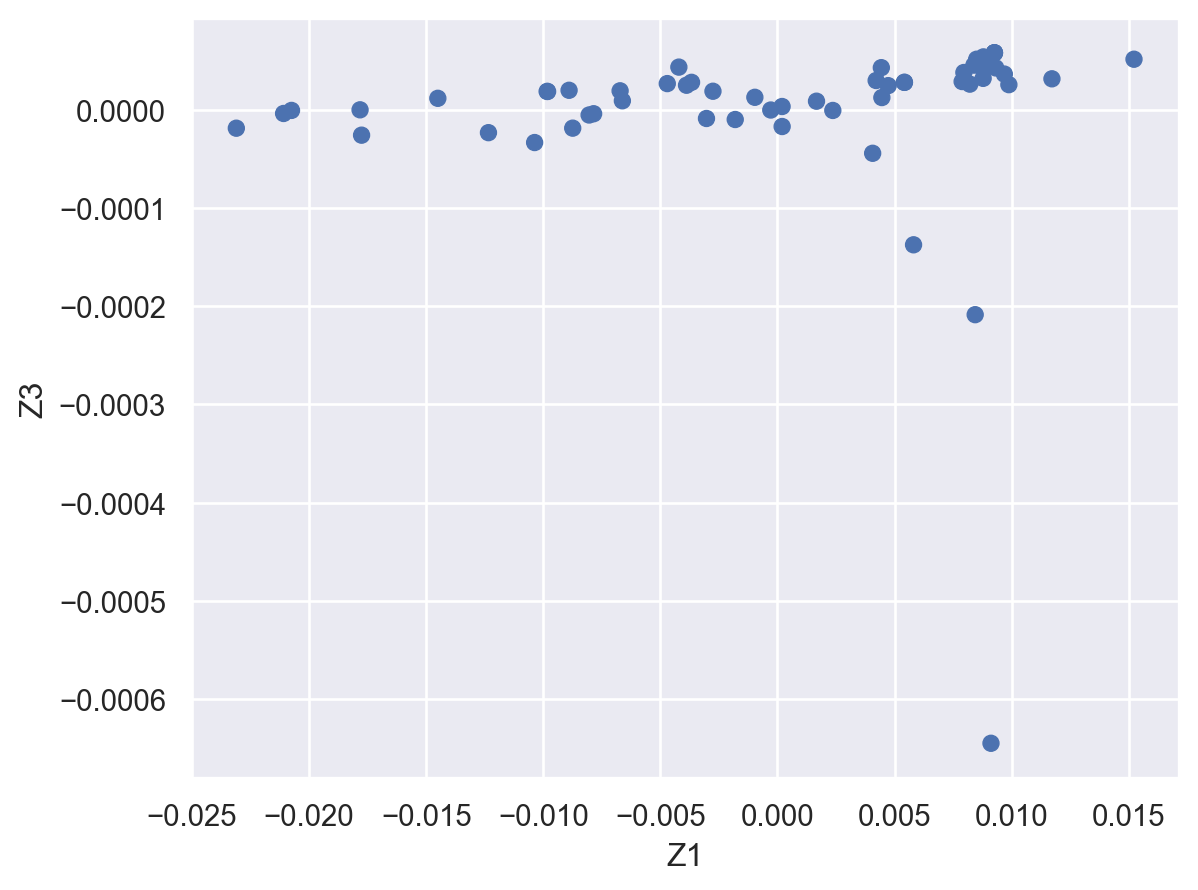

In [14]:
(
so.Plot()
.add(so.Dot(), data=tabla_final, x="Z1", y="Z3")
)

Tambien hicimos un grafico en 3D para ver la relacion de estas 3 columnas juntas

<Axes3D: >

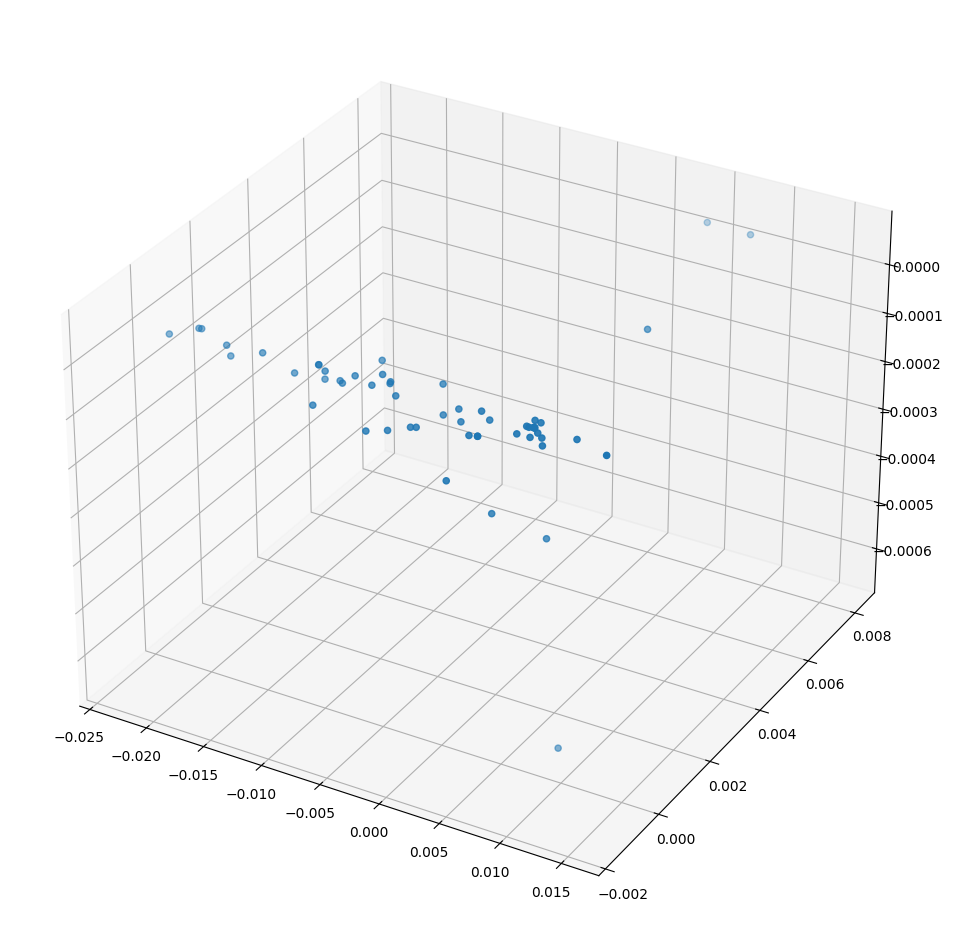

In [24]:
fig = plt.figure(figsize=(12, 12))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(tabla_final["Z1"],tabla_final["Z2"],tabla_final["Z3"])

ax

### Consigna 4

Si mi ACP viene de un espacio de 11, como quieren que arregle a 5?

In [25]:
consumidores = pd.read_csv("data/consumidores_libres.csv", sep=";")

consumidores_clean = consumidores.drop(columns=["PRODUCTOS", "Cantidad"])

consumidores_clean.head()

,31/12/2023,31/1/2024,29/2/2024,31/3/2024,30/4/2024
0,2500.0,3100.0,3450.0,3600.0,3700.0
1,1650.0,2300.0,2800.0,3100.0,3550.0
2,1990.0,2050.0,2050.0,2100.0,2100.0
3,1600.0,1990.0,2150.0,2200.0,2290.0
4,950.0,1250.0,1350.0,1500.0,1690.0


In [27]:
consumidores_gramo = pd.DataFrame()

for i in range(0, len(consumidores_clean)):
    consumidores_gramo = consumidores_gramo._append(consumidores_clean.iloc[i].div(consumidores["Cantidad"].iloc[i]), ignore_index = True)

consumidores_gramo = consumidores_gramo - consumidores_gramo.mean()

consumidores_gramo.head()

,31/12/2023,31/1/2024,29/2/2024,31/3/2024,30/4/2024
0,-0.569153,-0.585079,-0.782804,-0.967302,-1.141217
1,-0.585820,-0.351746,-0.282804,-0.267302,-0.057884
2,-0.245820,-0.601746,-1.032804,-1.267302,-1.507884
3,0.964180,1.328254,1.217196,1.032698,0.972116
4,-1.285820,-1.401746,-1.732804,-1.867302,-1.917884


### Consigna 5

### Consigna 6